# Data API

## Server
The CLIMADA data file server is hosted on https://data.iac.ethz.ch that can be accessed via a REST API at https://climada.ethz.ch.
For REST API details, see the [documentation](https:/climada.ethz.ch/rest/docs).

## Basic impact calculation with the API
We here show how to make a basic impact calculation with tropical cyclones for Haiti, for the year 2040, rcp4.5  and generated with 10 synthetic tracks. For more technical details on the API, see below.

In [1]:
from climada.util.api_client import Client

### The wrapper functions client.get_hazard() gets the dataset information, downloads the data and opens it as a hazard instance


2021-12-01 11:18:00,989 - climada.hazard.base - INFO - Reading /Users/szelie/climada/data/hazard/tropical_cyclone/tropical_cyclone_10synth_tracks_150arcsec_rcp45_HTI_2040/v1/tropical_cyclone_10synth_tracks_150arcsec_rcp45_HTI_2040.hdf5


/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


<GeoAxesSubplot:title={'center':'TC max intensity at each point'}>

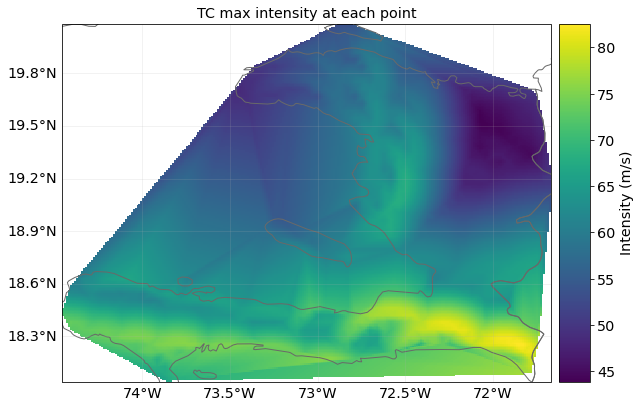

In [32]:
client = Client()
tc_haiti = client.get_hazard('tropical_cyclone', properties={'country_name': 'Haiti', 'climate_scenario': 'rcp45', 'year':'2040', 'n_tracks':'10'})
tc_haiti.plot_intensity(0)

### The wrapper functions client.get_litpop_default() gets the default litpop. If no country is given, the global dataset will be downloaded

In [6]:
litpop = client.get_litpop_default(country='Haiti')

2021-12-01 11:07:57,910 - climada.entity.exposures.base - INFO - Reading /Users/szelie/climada/data/exposures/litpop/LitPop_150arcsec_HTI/v1/LitPop_150arcsec_HTI.hdf5
2021-12-01 11:07:58,108 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-12-01 11:07:58,109 - climada.entity.exposures.base - INFO - category_id not set.
2021-12-01 11:07:58,109 - climada.entity.exposures.base - INFO - cover not set.
2021-12-01 11:07:58,109 - climada.entity.exposures.base - INFO - deductible not set.
2021-12-01 11:07:58,109 - climada.entity.exposures.base - INFO - centr_ not set.


### Get the default impact function for tropical cyclones

2021-12-01 11:12:15,190 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.


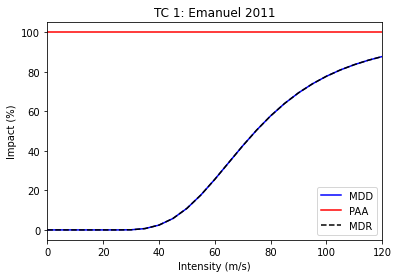

In [19]:
from climada.entity.impact_funcs import ImpactFuncSet, ImpfTropCyclone

imp_fun = ImpfTropCyclone.from_emanuel_usa()
imp_fun.check()
imp_fun.plot()

imp_fun_set = ImpactFuncSet()
imp_fun_set.append(imp_fun)

litpop.impact_funcs = imp_fun_set

### Calculate the impact

In [24]:
from climada.engine import Impact
impact = Impact()
impact.calc(litpop, imp_fun_set, tc_haiti)

2021-12-01 11:13:32,693 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-12-01 11:13:32,698 - climada.engine.impact - INFO - Calculating damage for 1329 assets (>0) and 37862 events.
2021-12-01 11:13:32,700 - climada.entity.exposures.base - INFO - No specific impact function column found for hazard TC. Using the anonymous 'impf_' column.


In [26]:
impact.aai_agg

212848315.09105086

### get a flood hazard

2021-12-01 11:26:38,512 - climada.hazard.base - INFO - Reading /Users/szelie/climada/data/hazard/river_flood/river_flood_150arcsec_rcp26_HTI_2030_2050/v1/river_flood_150arcsec_rcp26_HTI_2030_2050.hdf5


<GeoAxesSubplot:title={'center':'RF max intensity at each point'}>

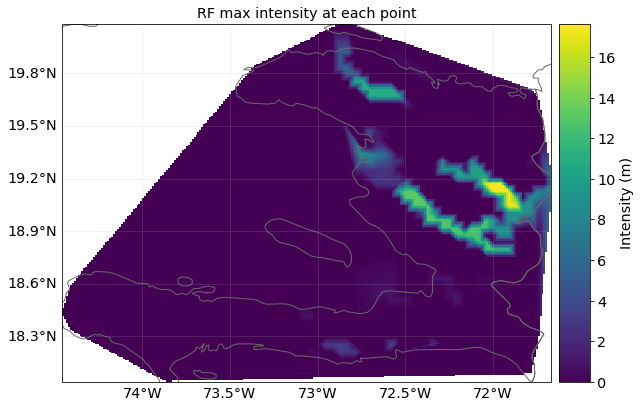

In [45]:
client = Client()
tc_haiti = client.get_hazard('river_flood', properties={'country_name': 'Haiti', 'climate_scenario': 'rcp26', 'year_range':'2030_2050'})
tc_haiti.plot_intensity(0)

### Get litpop in population count

In [53]:
pop = client.get_exposures(exposures_type='litpop', properties={
    'country_name': 'Haiti', 'exponents': '(0,1)', 'fin_mode': 'pop'})

2021-12-01 11:29:14,565 - climada.entity.exposures.base - INFO - Reading /Users/szelie/climada/data/exposures/litpop/LitPop_pop_150arcsec_HTI/v1/LitPop_pop_150arcsec_HTI.hdf5
2021-12-01 11:29:14,761 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-12-01 11:29:14,761 - climada.entity.exposures.base - INFO - category_id not set.
2021-12-01 11:29:14,761 - climada.entity.exposures.base - INFO - cover not set.
2021-12-01 11:29:14,762 - climada.entity.exposures.base - INFO - deductible not set.
2021-12-01 11:29:14,762 - climada.entity.exposures.base - INFO - centr_ not set.


<GeoAxesSubplot:title={'center':"LitPop Exposure for ['HTI'] at 150 as, year: 2018, financial mode:\npop, exp: [0, 1], admin1_calc: False"}>

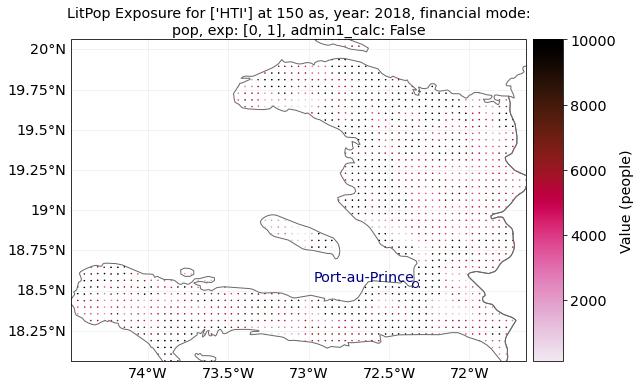

In [55]:
pop.plot_hexbin(vmax=10000)

### Get information on data available

In [66]:
client.get_data_types(data_type_group='hazard')

[DataTypeInfo(data_type='drought', data_type_group='hazard', description=None, properties=None),
 DataTypeInfo(data_type='tropical_cyclone', data_type_group='hazard', description=None, properties=None),
 DataTypeInfo(data_type='landslide', data_type_group='hazard', description=None, properties=None),
 DataTypeInfo(data_type='tracks', data_type_group='hazard', description='', properties=None),
 DataTypeInfo(data_type='wildfire', data_type_group='hazard', description=None, properties=None),
 DataTypeInfo(data_type='template', data_type_group='hazard', description=None, properties=None),
 DataTypeInfo(data_type='radiative_forcing', data_type_group='hazard', description=None, properties=None),
 DataTypeInfo(data_type='river_flood', data_type_group='hazard', description=None, properties=None),
 DataTypeInfo(data_type='wild_fire', data_type_group='hazard', description=None, properties=None),
 DataTypeInfo(data_type='storm_europe', data_type_group='hazard', description='', properties=None),
 

In [82]:
client.get_data_types(data_type_group='exposures')

[DataTypeInfo(data_type='litpop', data_type_group='exposures', description=None, properties=None),
 DataTypeInfo(data_type='base', data_type_group='exposures', description=None, properties=None),
 DataTypeInfo(data_type='earth_engine', data_type_group='exposures', description=None, properties=None),
 DataTypeInfo(data_type='crop_production', data_type_group='exposures', description=None, properties=None),
 DataTypeInfo(data_type='open_street_map', data_type_group='exposures', description=None, properties=None)]

### All dataset are available by country or globally with the same properties. To get an overview of the datasets available you can get the information for the global datasets:

In [86]:
global_tc_info = client.get_datasets(data_type='tropical_cyclone', properties={'geographical_scale':'global'})
global_flood_info = client.get_datasets(data_type='river_flood', properties={'geographical_scale':'global'})
global_litpop_info = client.get_datasets(data_type='litpop', properties={'geographical_scale':'global'})

### or for single country datasets:

In [ ]:
tc_info_haiti = client.get_datasets(data_type='tropical_cyclone', properties={'geographical_scale':'country', 'country_name':'Haiti'})


In [92]:
print(len(global_tc_info))
print(global_tc_info[0].properties)
print(tc_info_haiti[0].properties)

23
{'resolution': '150 arcsec', 'rcp': 'rcp26', 'year': '2040', 'n_tracks': '50', 'date_creation': '2021-08-11', 'climada_version': 'v2.2.0', 'geographical_scale': 'global'}
{'resolution': '150 arcsec', 'rcp': 'rcp26', 'year': '2040', 'n_tracks': '50', 'date_creation': '2021-08-11', 'climada_version': 'v2.2.0', 'geographical_scale': 'country', 'country_iso3alpha': 'HTI', 'country_name': 'Haiti'}


In [71]:
client.into_datasets_df(global_tc_info)

,data_type,data_type_group,uuid,name,version,status,doi,description,license,activation_date,expiration_date,resolution,rcp,year,n_tracks,date_creation,climada_version,geographical_scale
0,tropical_cyclone,hazard,6a75455c-d72e-43cb-8921-ffc9b3d46746,tropical_cyclone_50synth_tracks_150arcsec_rcp2...,v1,active,None,Global tropical cyclone Hazard computed from 1...,Attribution 4.0 International (CC BY 4.0),2021-09-01 13:50:19.392061+00:00,None,150 arcsec,rcp26,2040,50,2021-08-11,v2.2.0,global
1,tropical_cyclone,hazard,be8e5559-04fb-4526-8a72-b5772a641111,tropical_cyclone_50synth_tracks_150arcsec_rcp2...,v1,active,None,Global tropical cyclone Hazard computed from 1...,Attribution 4.0 International (CC BY 4.0),2021-09-01 13:50:19.543934+00:00,None,150 arcsec,rcp26,2060,50,2021-08-11,v2.2.0,global
2,tropical_cyclone,hazard,0773e4d3-b362-41d2-9d6d-5213c1caa647,tropical_cyclone_50synth_tracks_150arcsec_rcp2...,v1,active,None,Global tropical cyclone Hazard computed from 1...,Attribution 4.0 International (CC BY 4.0),2021-09-01 13:50:19.695693+00:00,None,150 arcsec,rcp26,2080,50,2021-08-11,v2.2.0,global
3,tropical_cyclone,hazard,a6508fba-8e50-4529-9e28-b1c84f898520,tropical_cyclone_50synth_tracks_150arcsec_rcp4...,v1,active,None,Global tropical cyclone Hazard computed from 1...,Attribution 4.0 International (CC BY 4.0),2021-09-01 13:50:19.864552+00:00,None,150 arcsec,rcp45,2040,50,2021-08-11,v2.2.0,global
4,tropical_cyclone,hazard,4a2a6014-191f-4645-90b9-53ee3d1aae85,tropical_cyclone_50synth_tracks_150arcsec_rcp4...,v1,active,None,Global tropical cyclone Hazard computed from 1...,Attribution 4.0 International (CC BY 4.0),2021-09-01 13:50:20.009758+00:00,None,150 arcsec,rcp45,2060,50,2021-08-11,v2.2.0,global
5,tropical_cyclone,hazard,a7c85068-ae0d-426b-920c-552cdd294b9c,tropical_cyclone_50synth_tracks_150arcsec_rcp4...,v1,active,None,Global tropical cyclone Hazard computed from 1...,Attribution 4.0 International (CC BY 4.0),2021-09-01 13:50:20.159750+00:00,None,150 arcsec,rcp45,2080,50,2021-08-11,v2.2.0,global
6,tropical_cyclone,hazard,e2894224-8e66-4927-a238-dd6956da4d26,tropical_cyclone_50synth_tracks_150arcsec_rcp8...,v1,active,None,Global tropical cyclone Hazard computed from 1...,Attribution 4.0 International (CC BY 4.0),2021-09-01 13:50:20.346806+00:00,None,150 arcsec,rcp85,2040,50,2021-08-11,v2.2.0,global
7,tropical_cyclone,hazard,a5396842-6702-427b-8c77-6a54be6b2238,tropical_cyclone_50synth_tracks_150arcsec_rcp8...,v1,active,None,Global tropical cyclone Hazard computed from 1...,Attribution 4.0 International (CC BY 4.0),2021-09-01 13:50:20.498868+00:00,None,150 arcsec,rcp85,2060,50,2021-08-11,v2.2.0,global
8,tropical_cyclone,hazard,059ccd85-c672-4ce7-a912-dd9496a000fe,tropical_cyclone_50synth_tracks_150arcsec_rcp8...,v1,active,None,Global tropical cyclone Hazard computed from 1...,Attribution 4.0 International (CC BY 4.0),None,None,150 arcsec,rcp85,2080,50,2021-08-11,v2.2.0,global
9,tropical_cyclone,hazard,a811f37c-9d1c-47a0-87a7-1c557a60dea8,tropical_cyclone_50synth_tracks_150arcsec_glob...,v1,active,None,Global tropical cyclone Hazard computed from 1...,Attribution 4.0 International (CC BY 4.0),2021-09-01 13:50:20.786856+00:00,None,150 arcsec,NaN,2020,50,2021-08-11,v2.2.0,global


In [73]:
client.into_datasets_df(global_flood_info)

,data_type,data_type_group,uuid,name,version,status,doi,description,license,activation_date,expiration_date,resolution,rcp,year_range,date_creation,climada_version,geographical_scale
0,river_flood,hazard,ebe6ed50-29e8-441f-b6a4-53575782045d,river_flood_150arcsec_rcp26_2010_2030,v1,active,None,"CLIMADA flood hazard by country, rcp and by 20...",Attribution 4.0 International (CC BY 4.0),2021-09-20 12:23:30.369981+00:00,None,150 arcsec,rcp26,2010_2030,2021-09-18,v2.2.0,global
1,river_flood,hazard,0ed4e832-98bd-45f4-95dc-fdfa14502e63,river_flood_150arcsec_rcp26_2030_2050,v1,active,None,"CLIMADA flood hazard by country, rcp and by 20...",Attribution 4.0 International (CC BY 4.0),2021-09-20 12:24:13.320575+00:00,None,150 arcsec,rcp26,2030_2050,2021-09-18,v2.2.0,global
2,river_flood,hazard,2596d102-6b73-4634-a524-d2a0daa707b9,river_flood_150arcsec_rcp26_2050_2070,v1,active,None,"CLIMADA flood hazard by country, rcp and by 20...",Attribution 4.0 International (CC BY 4.0),2021-09-20 12:25:00.335637+00:00,None,150 arcsec,rcp26,2050_2070,2021-09-18,v2.2.0,global
3,river_flood,hazard,3d93e1d4-10d9-420c-8fad-1ad982ee371a,river_flood_150arcsec_rcp26_2070_2090,v1,active,None,"CLIMADA flood hazard by country, rcp and by 20...",Attribution 4.0 International (CC BY 4.0),2021-09-20 12:25:44.786496+00:00,None,150 arcsec,rcp26,2070_2090,2021-09-18,v2.2.0,global
4,river_flood,hazard,6e1359e9-e1fd-407e-a1fd-b0c8ef7b2bc7,river_flood_150arcsec_rcp85_2010_2030,v1,active,None,"CLIMADA flood hazard by country, rcp and by 20...",Attribution 4.0 International (CC BY 4.0),2021-09-20 12:26:33.095754+00:00,None,150 arcsec,rcp85,2010_2030,2021-09-18,v2.2.0,global
5,river_flood,hazard,ed823773-bf2c-4967-8abd-4d220b21c61e,river_flood_150arcsec_rcp85_2030_2050,v1,active,None,"CLIMADA flood hazard by country, rcp and by 20...",Attribution 4.0 International (CC BY 4.0),2021-09-20 12:27:25.330778+00:00,None,150 arcsec,rcp85,2030_2050,2021-09-18,v2.2.0,global
6,river_flood,hazard,4a0698ef-5a83-4144-8588-1071d0ec2178,river_flood_150arcsec_rcp85_2050_2070,v1,active,None,"CLIMADA flood hazard by country, rcp and by 20...",Attribution 4.0 International (CC BY 4.0),2021-09-20 12:28:23.562763+00:00,None,150 arcsec,rcp85,2050_2070,2021-09-18,v2.2.0,global
7,river_flood,hazard,f2271845-0f71-4b2b-a34e-8bbac4c15561,river_flood_150arcsec_rcp85_2070_2090,v1,active,None,"CLIMADA flood hazard by country, rcp and by 20...",Attribution 4.0 International (CC BY 4.0),2021-09-20 12:29:31.025864+00:00,None,150 arcsec,rcp85,2070_2090,2021-09-18,v2.2.0,global


In [80]:
client.into_datasets_df(global_litpop_info)

,data_type,data_type_group,uuid,name,version,status,doi,description,license,activation_date,...,res_arcsec,exponents,fin_mode,geographical_scale,date_creation,climada_version,total_values,admin1_calc,reference_year,gpw_version
0,litpop,exposures,5efb4709-0f0b-48f1-8ff6-54041c0e8f3e,LitPop_pop_150arcsec_global,v1,active,None,"Global ""LitPop population exposure: Gridded po...",Attribution 4.0 International (CC BY 4.0),2021-09-13 09:09:22.912016+00:00,...,150,"(0,1)",pop,global,2021-09-23,v2.2.0,None,False,2018,11
1,litpop,exposures,709dc5cb-ced4-4a58-a1b8-332e08d0dbea,LitPop_150arcsec_global,v1,active,None,"""Global LitPop asset value exposure: Gridded p...",Attribution 4.0 International (CC BY 4.0),2021-09-13 09:09:31.372629+00:00,...,150,"(1,1)",pc,global,2021-09-23,v2.2.0,None,False,2018,11
2,litpop,exposures,51264c57-ef8b-4575-8aaa-bb1ec52a741c,LitPop_assets_pc_150arcsec_global,v1,active,None,Global LitPop asset value exposure: Gridded ph...,Attribution 4.0 International (CC BY 4.0),2021-09-13 09:09:55.312681+00:00,...,150,"(3,0)",pc,global,2021-09-23,v2.2.0,None,False,2018,11


## Client

For programmatical access to the CLIMADA data API there is a specific REST call wrapper class: `climada.util.client.Client`.

In [1]:
Client?

Init signature: Client()
Docstring:     
Python wrapper around REST calls to the CLIMADA data API server.
    
Init docstring:
Constructor of Client.

Data API host and chunk_size (for download) are configurable values.
Default values are 'climada.ethz.ch' and 8096 respectively.
File:           c:\users\me\www\climada_python\climada\util\api_client.py
Type:           type
Subclasses:     


In [2]:
client = Client()
client.host, client.chunk_size

('https://climada.ethz.ch', 8192)

The url to the API server and the chunk size for the file download can be configured in 'climada.conf'. Just replace the corresponding default values:

```json
    "data_api": {
        "host": "https://climada.ethz.ch",
        "chunk_size": 8192,
        "cache_db": "{local_data.system}/.downloads.db"
    }
```

The other configuration value affecting the data_api client, `cache_db`, is the path to an SQLite database file, which is keeping track of the files that are successfully downloaded from the api server. Before the Client attempts to download any file from the server, it checks whether the file has been downloaded before and if so, whether the previously downloaded file still looks good (i.e., size and time stamp are as expected). If all of this is the case, the file is simply read from disk without submitting another request.

The main methods of the client are `get_dataset`, `get_datasets` and `download_dataset`. The first two return meta-data about one ore more datasets and the latter downloads all files associated to a dataset.

The signature of `get_dataset` and `get_datasets` are almost identical. Both take `data_type`, `name`, `version`, `properties` and `status` as optional arguments.
The difference is in the default value of the `status` ("active" vs. `None`) and the return type: `get_datasets` returns a list of `DatasetInfo` objects, which may me empty, whereas `get_dataset` returns a single `DatasetInfo` object - or raises an Exception if the arguments provided don't allow a positive identification of the dataset.

In [3]:
client.get_datasets?

Signature:
client.get_datasets(
    data_type=None,
    name=None,
    version=None,
    properties=None,
    status='active',
)
Docstring:
Find all datasets matching the given parameters.

Parameters
----------
data_type : str, optional
    data_type of the dataset, e.g., 'litpop' or 'draught'
name : str, optional
    the name of the dataset
version : str, optional
    the version of the dataset
properties : dict, optional
    search parameters for dataset properties, by default None
    any property has a string for key and can be a string or a list of strings for value
status : str, optional
    valid values are 'preliminary', 'active', 'expired', and 'test_dataset',
    by default 'active'

Returns
-------
list of DatasetInfo
File:      c:\users\me\www\climada_python\climada\util\api_client.py
Type:      method


## Metadata

### Unique Identifiers
Any dataset can be identified with **data_type**, **name** and **version**. The combination of the three is unique in the API servers' underlying database.
However, sometimes the name is already enough for identification.
All datasets have a UUID, a universally unique identifier, which is part of their individual url. 
E.g., the uuid of the dataset https://climada.ethz.ch/rest/dataset/b1c76120-4e60-4d8f-99c0-7e1e7b7860ec is "b1c76120-4e60-4d8f-99c0-7e1e7b7860ec".
One can retrieve their meta data by:

In [4]:
client.get_dataset_by_uuid('b1c76120-4e60-4d8f-99c0-7e1e7b7860ec')

DatasetInfo(uuid='b1c76120-4e60-4d8f-99c0-7e1e7b7860ec', data_type=DataTypeInfo(data_type='litpop', data_type_group='exposures', description=None, properties=None), name='LitPop_assets_pc_150arcsec_SGS', version='v1', status='active', properties={'resolution': '150arcsec', 'exponents': '(3,0)', 'fin_mode': 'pc', 'geographical_scale': 'country', 'date_creation': '2021-09-23', 'climada_version': 'v2.2.0', 'country_iso3alpha': 'SGS', 'country_name': 'South Georgia and the South Sandwich Islands'}, files=[FileInfo(uuid='b1c76120-4e60-4d8f-99c0-7e1e7b7860ec', url='https://data.iac.ethz.ch/climada/b1c76120-4e60-4d8f-99c0-7e1e7b7860ec/LitPop_assets_pc_150arcsec_SGS.hdf5', file_name='LitPop_assets_pc_150arcsec_SGS.hdf5', file_format='hdf5', file_size=1086488, check_sum='md5:27bc1846362227350495e3d946dfad5e')], doi=None, description='LitPop CLIMADA Exposures by country, at a resolution of 150arcsec. The asset values are measured in produced capital based on nightlights intensity (NASA).', licen

or by filtering:

In [5]:
client.get_dataset(name='LitPop_assets_pc_150arcsec_SGS', version='v1')  # or client.get_dataset(name='LitPop_assets_pc_150arcsec_SGS') since there is only 1 version atm.

DatasetInfo(uuid='b1c76120-4e60-4d8f-99c0-7e1e7b7860ec', data_type=DataTypeInfo(data_type='litpop', data_type_group='exposures', description=None, properties=None), name='LitPop_assets_pc_150arcsec_SGS', version='v1', status='active', properties={'resolution': '150arcsec', 'exponents': '(3,0)', 'fin_mode': 'pc', 'geographical_scale': 'country', 'date_creation': '2021-09-23', 'climada_version': 'v2.2.0', 'country_iso3alpha': 'SGS', 'country_name': 'South Georgia and the South Sandwich Islands'}, files=[FileInfo(uuid='b1c76120-4e60-4d8f-99c0-7e1e7b7860ec', url='https://data.iac.ethz.ch/climada/b1c76120-4e60-4d8f-99c0-7e1e7b7860ec/LitPop_assets_pc_150arcsec_SGS.hdf5', file_name='LitPop_assets_pc_150arcsec_SGS.hdf5', file_format='hdf5', file_size=1086488, check_sum='md5:27bc1846362227350495e3d946dfad5e')], doi=None, description='LitPop CLIMADA Exposures by country, at a resolution of 150arcsec. The asset values are measured in produced capital based on nightlights intensity (NASA).', licen

### Data types
A sorted list of all registered data types can be created like this:

In [6]:
import pandas as pd
data_types = client.get_data_types()

dtf = pd.DataFrame(data_types)
dtf.sort_values(['data_type_group', 'data_type'])

,data_type,data_type_group,description,properties
28,cost_benefit,cost_benefit,None,None
13,disc_rates,disc_rates,None,None
0,dummy,dummy-group,self explained,None
3,test-dummy,dummy-group,None,None
23,entity,entity,None,None
8,base,exposures,None,None
19,crop_production,exposures,None,None
11,earth_engine,exposures,None,None
1,litpop,exposures,None,None
26,open_street_map,exposures,None,None


The `DataTypeInfo` objects returned by `get_data_types` will - for performance reasons - always have `None` as properties. But the method `get_data_type` returns a single `DataTypeInfo` object that also contains the complete list of properties that have been assigned to any of the datasets registerd under this type.

In [7]:
client.get_data_type('storm_europe')

DataTypeInfo(data_type='storm_europe', data_type_group='hazard', description='', properties=['climada_version', 'country_iso3alpha', 'geographical_scale', 'country_name', 'license', 'date_creation', 'resolution'])

### Data Set Status
The datasets of climada.ethz.ch may have the following stati:
- **active**: the deault for real life data
- **preliminary**: when the dataset is already uploaded but some information or file is still missing
- **expired**: when a dataset is inactivated again
- **test_dataset**: data sets that are used in unit or integration tests have this status in order to be taken seriously by accident
When collecting a list of datasets with `get_datasets`, the default dataset status will be 'active'. With the argument `status=None` this filter can be turned off.

### DatasetInfo Objects and DataFrames

As stated above `get_dataset` (or `get_dataset_by_uuid`) return a `DatasetInfo` object and `get_datasets` a list thereof.

In [8]:
from climada.util.api_client import DatasetInfo
DatasetInfo?

Init signature:
DatasetInfo(
    uuid: str,
    data_type: climada.util.api_client.DataTypeInfo,
    name: str,
    version: str,
    status: str,
    properties: dict,
    files: list,
    doi: str,
    description: str,
    license: str,
    activation_date: str,
    expiration_date: str,
) -> None
Docstring:      dataset data from CLIMADA data API.
File:           c:\users\me\www\climada_python\climada\util\api_client.py
Type:           type
Subclasses:     


where files is a list of `FileInfo` objects:

In [9]:
from climada.util.api_client import FileInfo
FileInfo?

Init signature:
FileInfo(
    uuid: str,
    url: str,
    file_name: str,
    file_format: str,
    file_size: int,
    check_sum: str,
) -> None
Docstring:      file data from CLIMADA data API.
File:           c:\users\me\www\climada_python\climada\util\api_client.py
Type:           type
Subclasses:     


#### Example

In [10]:
ds = client.get_dataset_by_uuid('b1c76120-4e60-4d8f-99c0-7e1e7b7860ec')
ds.uuid, ds.data_type, ds.name, ds.version, ds.properties

('b1c76120-4e60-4d8f-99c0-7e1e7b7860ec',
 DataTypeInfo(data_type='litpop', data_type_group='exposures', description=None, properties=None),
 'LitPop_assets_pc_150arcsec_SGS',
 'v1',
 {'resolution': '150arcsec',
  'exponents': '(3,0)',
  'fin_mode': 'pc',
  'geographical_scale': 'country',
  'date_creation': '2021-09-23',
  'climada_version': 'v2.2.0',
  'country_iso3alpha': 'SGS',
  'country_name': 'South Georgia and the South Sandwich Islands'})

#### Convert into DataFrame
There are conveinience functions to easily convert datasets into pandas DataFrames, `get_datasets` and `expand_files`:

In [11]:
client.into_datasets_df?

Signature: client.into_datasets_df(datasets)
Docstring:
Convenience function providing a DataFrame of datasets with properties.

Parameters
----------
datasets : list of DatasetInfo
    e.g., return of get_datasets

Returns
-------
pandas.DataFrame
    of datasets with properties as found in query by arguments
File:      c:\users\me\www\climada_python\climada\util\api_client.py
Type:      function


In [12]:
from climada.util.api_client import Client
client = Client()
litpop_datasets = client.get_datasets(data_type='litpop', properties={'country_name': 'South Georgia and the South Sandwich Islands'})
litpop_df = client.into_datasets_df(litpop_datasets)
litpop_df

,data_type,data_type_group,uuid,name,version,status,doi,description,license,activation_date,expiration_date,resolution,exponents,fin_mode,geographical_scale,date_creation,climada_version,country_iso3alpha,country_name
0,litpop,exposures,b1c76120-4e60-4d8f-99c0-7e1e7b7860ec,LitPop_assets_pc_150arcsec_SGS,v1,active,None,"LitPop CLIMADA Exposures by country, at a reso...",Attribution 4.0 International (CC BY 4.0),2021-09-13 09:08:28.358559+00:00,None,150arcsec,"(3,0)",pc,country,2021-09-23,v2.2.0,SGS,South Georgia and the South Sandwich Islands
1,litpop,exposures,3d516897-5f87-46e6-b673-9e6c00d110ec,LitPop_pop_150arcsec_SGS,v1,active,None,"LitPop CLIMADA Exposures by country, at a reso...",Attribution 4.0 International (CC BY 4.0),2021-09-13 09:09:10.634374+00:00,None,150arcsec,"(0,1)",pop,country,2021-09-23,v2.2.0,SGS,South Georgia and the South Sandwich Islands
2,litpop,exposures,a6864a65-36a2-4701-91bc-81b1355103b5,LitPop_150arcsec_SGS,v1,active,None,"LitPop CLIMADA Exposures by country, at a reso...",Attribution 4.0 International (CC BY 4.0),2021-09-13 09:09:30.907938+00:00,None,150arcsec,"(1,1)",pc,country,2021-09-23,v2.2.0,SGS,South Georgia and the South Sandwich Islands


In [13]:
client.into_files_df?

Signature: client.into_files_df(datasets)
Docstring:
Convenience function providing a DataFrame of files aligned with the input datasets.

Parameters
----------
datasets : list of DatasetInfo
    e.g., return of get_datasets

Returns
-------
pandas.DataFrame
    of the files' informations including dataset informations
File:      c:\users\me\www\climada_python\climada\util\api_client.py
Type:      function


In [14]:
client.into_files_df(litpop_datasets)

,data_type,data_type_group,uuid,name,version,status,doi,description,license,activation_date,...,geographical_scale,date_creation,climada_version,country_iso3alpha,country_name,url,file_name,file_format,file_size,check_sum
0,litpop,exposures,b1c76120-4e60-4d8f-99c0-7e1e7b7860ec,LitPop_assets_pc_150arcsec_SGS,v1,active,None,"LitPop CLIMADA Exposures by country, at a reso...",Attribution 4.0 International (CC BY 4.0),2021-09-13 09:08:28.358559+00:00,...,country,2021-09-23,v2.2.0,SGS,South Georgia and the South Sandwich Islands,https://data.iac.ethz.ch/climada/b1c76120-4e60...,LitPop_assets_pc_150arcsec_SGS.hdf5,hdf5,1086488,md5:27bc1846362227350495e3d946dfad5e
1,litpop,exposures,3d516897-5f87-46e6-b673-9e6c00d110ec,LitPop_pop_150arcsec_SGS,v1,active,None,"LitPop CLIMADA Exposures by country, at a reso...",Attribution 4.0 International (CC BY 4.0),2021-09-13 09:09:10.634374+00:00,...,country,2021-09-23,v2.2.0,SGS,South Georgia and the South Sandwich Islands,https://data.iac.ethz.ch/climada/3d516897-5f87...,LitPop_pop_150arcsec_SGS.hdf5,hdf5,1086488,md5:22f35f75219addb3f37bbd7a2030d994
2,litpop,exposures,a6864a65-36a2-4701-91bc-81b1355103b5,LitPop_150arcsec_SGS,v1,active,None,"LitPop CLIMADA Exposures by country, at a reso...",Attribution 4.0 International (CC BY 4.0),2021-09-13 09:09:30.907938+00:00,...,country,2021-09-23,v2.2.0,SGS,South Georgia and the South Sandwich Islands,https://data.iac.ethz.ch/climada/a6864a65-36a2...,LitPop_150arcsec_SGS.hdf5,hdf5,1086488,md5:a20972acfc30c7429f99a568c8288199


## Download

There are two methods to download files through the API: `download_dataset` which takes a `DatasetInfo` as argument and downloads all files of the dataset at once and `download_file` which takes a single `FileInfo` object as argument.

In [15]:
client.download_dataset?

Signature:
client.download_dataset(
    dataset,
    target_dir=WindowsPath('C:/Users/me/climada/data'),
    organize_path=True,
    check=<function checksize at 0x0000022B5C332AF0>,
)
Docstring:
Download all files from a given dataset to a given directory.

Parameters
----------
dataset : DatasetInfo
    the dataset
target_dir : Path, optional
    target directory for download, by default `climada.util.constants.SYSTEM_DIR`
organize_path: bool, optional
    if set to True the files will end up in subdirectories of target_dir:
    [target_dir]/[data_type_group]/[data_type]/[name]/[version]
    by default True
check : function, optional
    how to check download success for each file, by default Download.checksize

Returns
-------
download_dir : Path
    the path to the directory containing the downloaded files,
    will be created if organize_path is True
downloaded_files : list of Path
    the downloaded files themselves

Raises
------
Exception
    when one of the files cannot be dow

In [16]:
client.download_file?

Signature:
client.download_file(
    local_path,
    fileinfo,
    check=<function checksize at 0x0000022B5C332AF0>,
    retries=3,
)
Docstring:
Download a file if it is not already present at the target destination.

Parameters
----------
local_path : Path
    target destination,
    if it is a directory the original filename (fileinfo.filen_name) is kept
fileinfo : FileInfo
    file object as retrieved from the data api
check : function, optional
    how to check download success, by default checksize
retries : int, optional
    how many times one should retry in case of failure, by default 3

Returns
-------
Path
    the path to the downloaded file

Raises
------
Exception
    when number of retries was exceeded or when a download is already running
File:      c:\users\me\www\climada_python\climada\util\api_client.py
Type:      method


#### Cache
Both methods avoid superfluous downloads by keeping track of all downloads in a sqlite db file. The client will make sure that the same file is never downloaded to the same target twice.

#### Examples

In [17]:
download_dir, ds_files = client.download_dataset(ds)
ds_files[0], ds_files[0].is_file()

(WindowsPath('C:/Users/me/climada/data/exposures/litpop/LitPop_assets_pc_150arcsec_SGS/v1/LitPop_assets_pc_150arcsec_SGS.hdf5'),
 True)

In [18]:
from pathlib import Path
ds_file = client.download_file(Path('.'), ds.files[0])
ds_file, ds_file.is_file()

(WindowsPath('LitPop_assets_pc_150arcsec_SGS.hdf5'), True)